In [1]:
import numpy as np 
import pandas as pd 
import string # special operations on strings

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup #converts the contents of a page into a proper format
import requests #used to get the content from a web page

In [3]:
# Amazon review Scrapping   
URL = "https://www.amazon.in/Lenovo-IdeaCentre-Desktop-Graphics-90N9004KIN/dp/B08DNLF1BF?th=1"
HEADERS = ({'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})
  
# Making the HTTP Request
webpage = requests.get(URL, headers=HEADERS)
  
# Creating the Soup Object containing all data
soup = BeautifulSoup(webpage.content, "lxml")

link=[]
for i in soup.findAll("a",{'data-hook':"see-all-reviews-link-foot"}):
    link.append(i['href'])

# Scrapping all customer reviews
def Searchreviews(review_link):
    url="https://www.amazon.in"+review_link
    print(url)
    page=requests.get(url,headers=HEADERS)
    if page.status_code==200:
        return page
    else:
        return "Error"
    
# retreiving product reviews
reviews = []
for i in range(len(link)):
    for j in range(5):
        response=Searchreviews(link[i]+'&pageNumber='+str(j))
        soup=BeautifulSoup(response.content, "lxml")
        for j in soup.findAll("span",{'data-hook':"review-body"}):
            reviews.append(j.text)
    
rev={'reviews':reviews} #converting the reviews list into a dictionary
review_data=pd.DataFrame.from_dict(rev) #converting this dictionary into a dataframe
review_data.to_csv('Scraping reviews.csv',index=False)
       

https://www.amazon.in/Lenovo-IdeaCentre-Desktop-Graphics-90N9004KIN/product-reviews/B08DNLF1BF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/Lenovo-IdeaCentre-Desktop-Graphics-90N9004KIN/product-reviews/B08DNLF1BF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/Lenovo-IdeaCentre-Desktop-Graphics-90N9004KIN/product-reviews/B08DNLF1BF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/Lenovo-IdeaCentre-Desktop-Graphics-90N9004KIN/product-reviews/B08DNLF1BF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/Lenovo-IdeaCentre-Desktop-Graphics-90N9004KIN/product-reviews/B08DNLF1BF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4


In [4]:
amazon = pd.read_csv("Scraping reviews.csv", encoding='unicode_escape')
amazon = amazon.drop_duplicates()
amazon.head()

,reviews
0,"\n\n Fantastic Product. In this price range, ..."
1,\n\n I was looking to buy a desktop PC and fo...
2,\n\n Two days since purchased this product on...
3,\n\n I have considered buying this product on...
4,\n\n RAM XMP profile in BIOS unavailable. Hen...


In [5]:
amazon['reviews']=amazon['reviews'].apply(lambda x:x.strip('\n')) # To remove '\n' from every review
amazon.head()

,reviews
0,"Fantastic Product. In this price range, this..."
1,I was looking to buy a desktop PC and found ...
2,Two days since purchased this product on pri...
3,I have considered buying this product on Ama...
4,RAM XMP profile in BIOS unavailable. Hence e...


In [6]:
from nltk import word_tokenize
tokens = amazon.reviews.map(word_tokenize)
tokens

0     [Fantastic, Product, ., In, this, price, range...
1     [I, was, looking, to, buy, a, desktop, PC, and...
2     [Two, days, since, purchased, this, product, o...
3     [I, have, considered, buying, this, product, o...
4     [RAM, XMP, profile, in, BIOS, unavailable, ., ...
5     [Reviewing, after, a, month, usage.I, was, loo...
6     [Great, PC, ,, has, very, tight, specs, with, ...
7     [The, description, does, n't, do, justice, to,...
8     [I, was, also, expecting, a, monitor, along, w...
9     [Got, it, at, ~96000, for, playing, Microsoft,...
20    [Great, performance, but, cheated, on, promise...
21    [The, Desktop, is, very, good, with, excellent...
22    [Was, sceptical, at, first, thinking, about, b...
23    [It, work, fantastic, ,, I, am, using, it, for...
24    [I, 'm, super, happy, with, this, product, ., ...
25        [FOR, 3D, DESIGNING, ITS, PERFORMANCE, GREAT]
26                                          [Good, one]
27    [I, use, this, desktop, for, light, gaming

In [7]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [8]:
# Function for Cleaning the tweets
import re
import string
def cleantext(review):
    review = review.lower()
    review = deEmojify(review)
    review = "".join([x for x in review if x not in string.punctuation])
    review = re.sub('[^a-zA-Z0-9]', ' ', review) # Remove Mentions
    return review

In [9]:
# Clean The Text
amazon["reviews"] = amazon["reviews"].apply(cleantext)
amazon["reviews"]

0       fantastic product in this price range this i...
1       i was looking to buy a desktop pc and found ...
2       two days since purchased this product on pri...
3       i have considered buying this product on ama...
4       ram xmp profile in bios unavailable hence ev...
5       reviewing after a month usagei was looking f...
6       great pc has very tight specs with no big ov...
7       the description doesnt do justice to product...
8          i was also expecting a monitor along with it
9       got it at 96000 for playing microsoft flight...
20      great performance but cheated on promised 32...
21      the desktop is very good with excellent perf...
22      was sceptical at first thinking about balanc...
23      it work fantastic i am using it for a while ...
24      im super happy with this product i needed a ...
25               for 3d designing its performance great
26                                             good one
27      i use this desktop for light gaming and 

# Analyzing the sentiment of reviews using the library 'TextBlob'

In [10]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["reviews"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
amazon[["subjectivity", "polarity"]] = amazon.apply(sentiment_analysis, axis=1)

amazon

,reviews,subjectivity,polarity
0,fantastic product in this price range this i...,0.522222,0.155556
1,i was looking to buy a desktop pc and found ...,0.532778,0.174365
2,two days since purchased this product on pri...,0.379167,0.179167
3,i have considered buying this product on ama...,0.683007,0.227124
4,ram xmp profile in bios unavailable hence ev...,0.620000,0.100000
5,reviewing after a month usagei was looking f...,0.502516,0.167350
6,great pc has very tight specs with no big ov...,0.523554,0.119728
7,the description doesnt do justice to product...,0.563636,0.409091
8,i was also expecting a monitor along with it,0.000000,0.000000
9,got it at 96000 for playing microsoft flight...,0.300000,1.000000


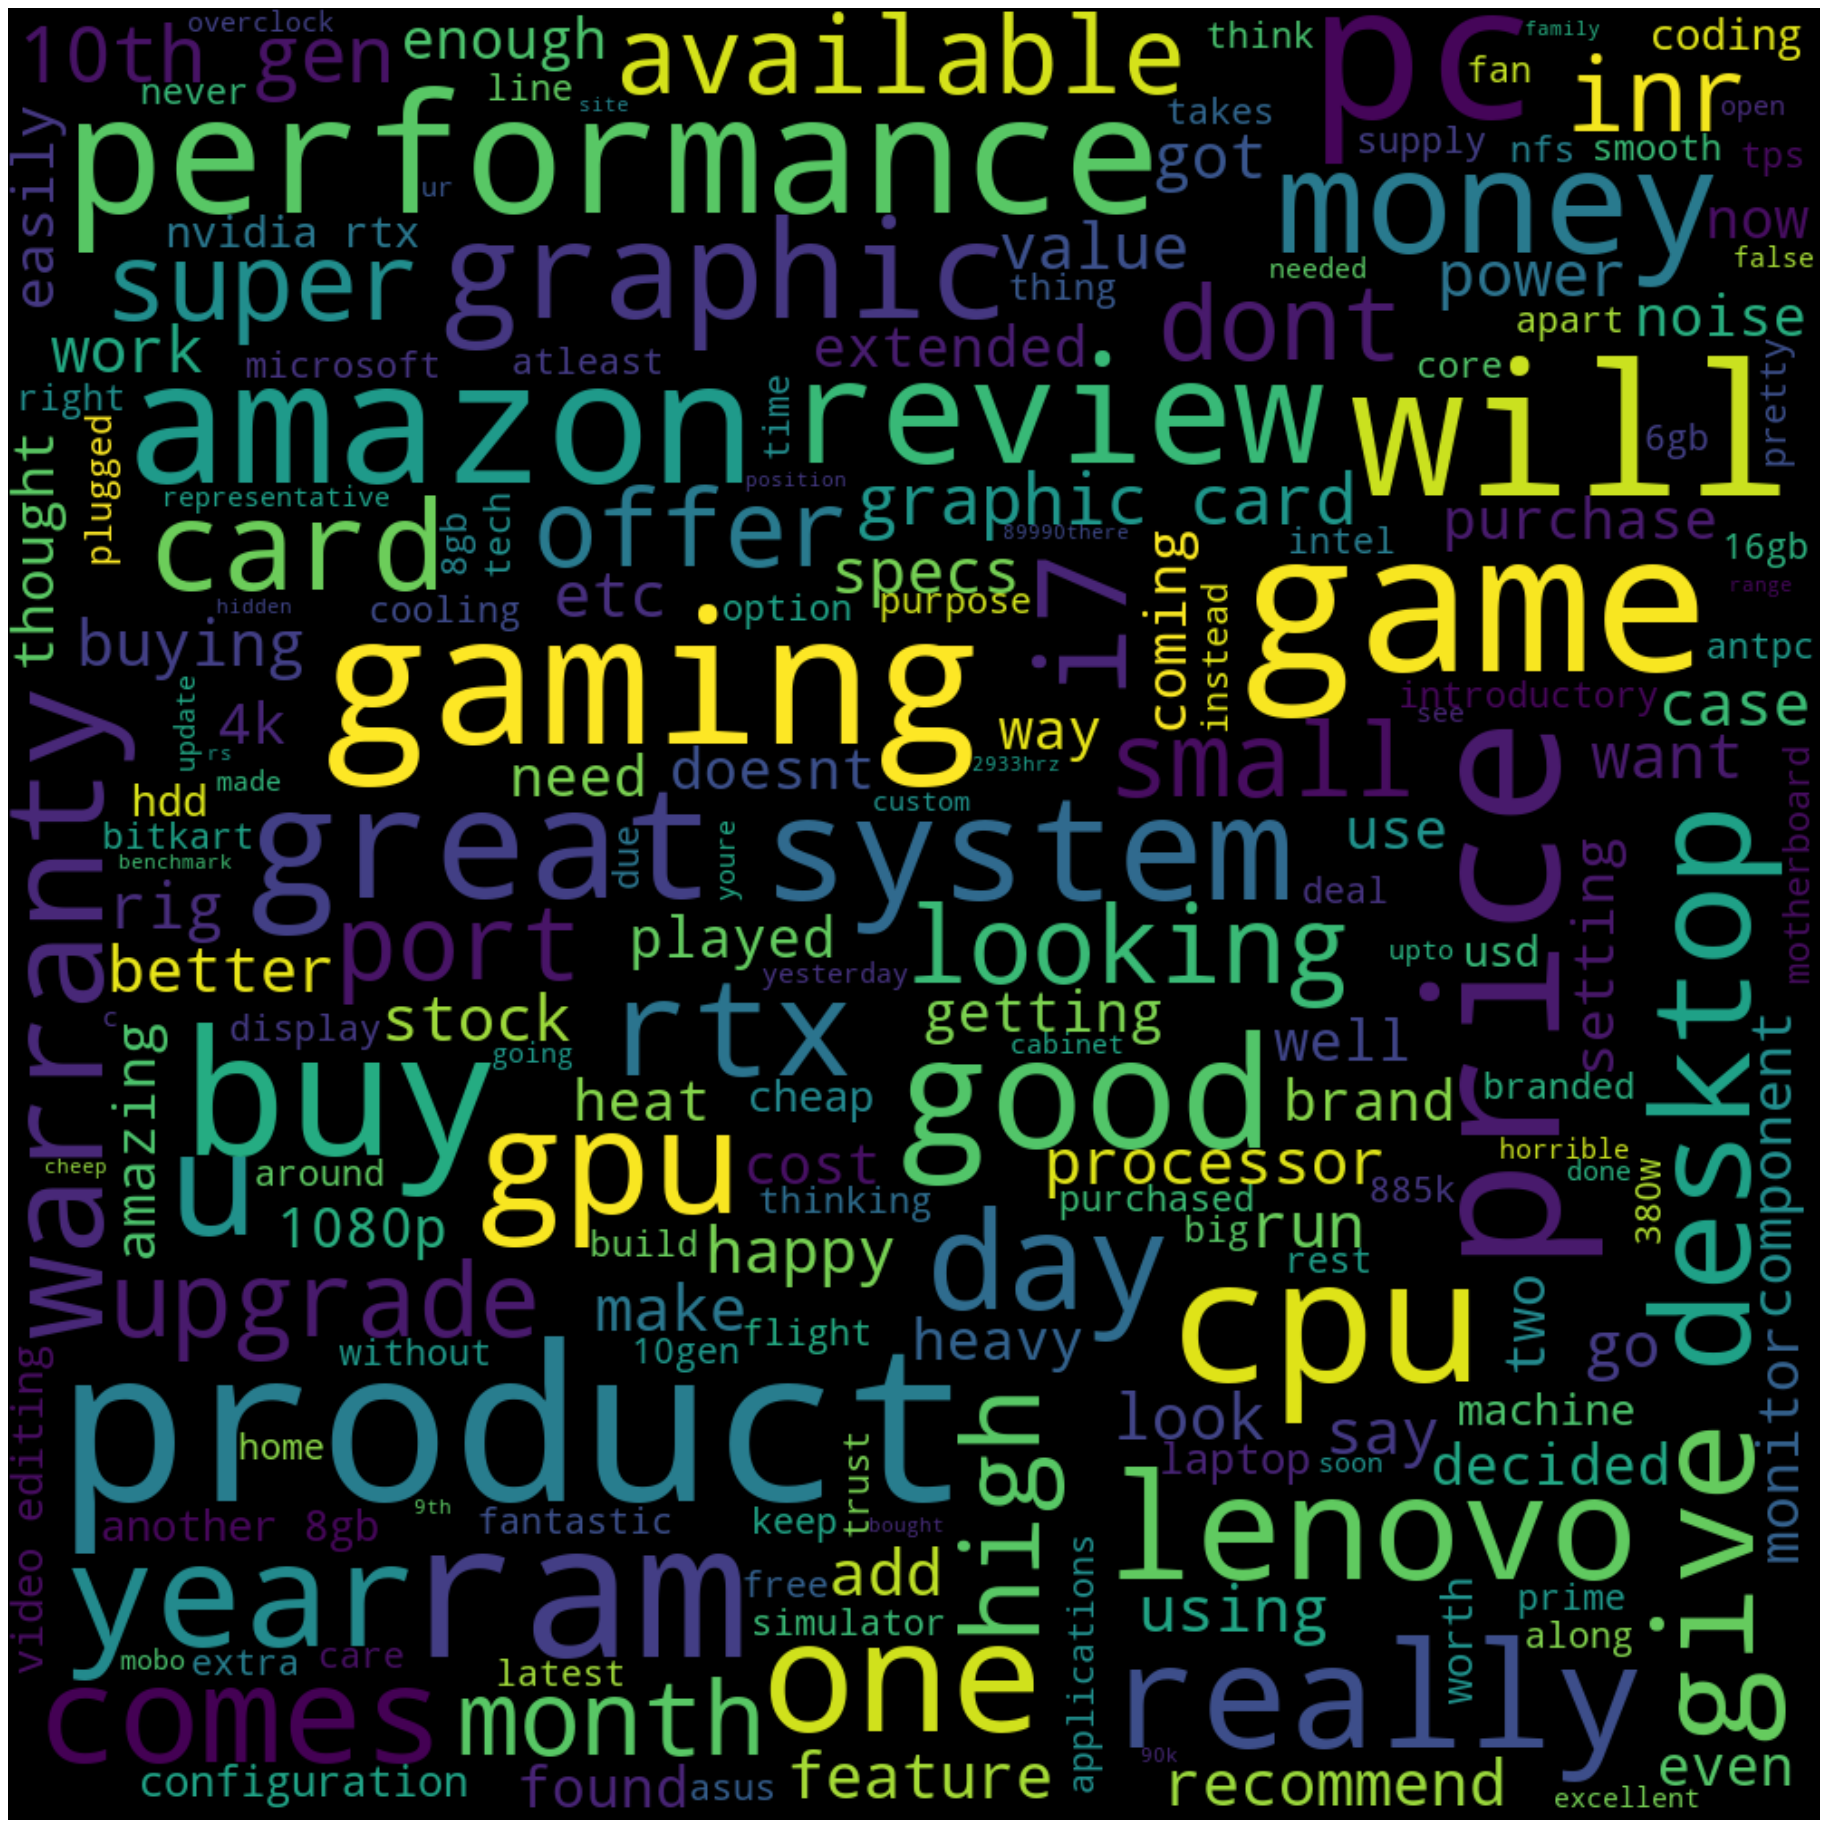

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in amazon["reviews"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 120).generate(allwords)
plt.figure(figsize=(40, 30), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [12]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
amazon["analysis"] = amazon["polarity"].apply(analysis)

In [13]:
positive = amazon[amazon['analysis'] == 'Positive']
negative = amazon[amazon['analysis'] == 'Negative']

print('***Positive Reviews***')
for i, row in positive[:5].iterrows():
  print(' -' + row['reviews'])

print('\n\n***Negative Reviews***')
for i, row in negative[:5].iterrows():
  print(' -' + row['reviews'])

***Positive Reviews***
 -  fantastic product in this price range this is very cheep deal you are getting i7 10th gen 9th position on benchmark site with rtx family graphic card 2060 with 8gb 2933hrz ram what else you under 90k i bought it of rs 89990there are some hidden features which are below1 it is having 3 display ports not imaginable but it is true2 2 hdmi ports3 1 vga port4 6 usb ports yes you read correctly5 1 ctype connection port6 1 card reader7 35 mm audio jack8 powerful processor cooler with copper coil comes with 10gen intel processor9 2x80 watt cooling fans additionalapart from this i operated for sometime and it is really smoothwill keep you posted on performance
 -  i was looking to buy a desktop pc and found this introductory offer which was irresistible decided to buy this product and i am extremely happy with it i am writing this review after a heavy usage of 20 daysi have played graphic intense games like nfs heat hitman 2 microsoft flight simulator 2020 and metro e

In [14]:
# Ratio of positive over negative reviews
len(positive) / len(negative)

8.666666666666666

# Part Of Speech Tagging

In [15]:
amazon1 = amazon.drop(["subjectivity","polarity","analysis"],axis =1)

In [16]:
amazon1 = [reviews.strip() for reviews in amazon1.reviews] # remove both the leading and the trailing characters
amazon1 = [reviews for reviews in amazon1 if reviews] # removes empty strings, because they are considered in Python as False
amazon1

['fantastic product in this price range this is very cheep deal you are getting i7 10th gen 9th position on benchmark site with rtx family graphic card 2060 with 8gb 2933hrz ram what else you under 90k i bought it of rs 89990there are some hidden features which are below1 it is having 3 display ports not imaginable but it is true2 2 hdmi ports3 1 vga port4 6 usb ports yes you read correctly5 1 ctype connection port6 1 card reader7 35 mm audio jack8 powerful processor cooler with copper coil comes with 10gen intel processor9 2x80 watt cooling fans additionalapart from this i operated for sometime and it is really smoothwill keep you posted on performance',
 'i was looking to buy a desktop pc and found this introductory offer which was irresistible decided to buy this product and i am extremely happy with it i am writing this review after a heavy usage of 20 daysi have played graphic intense games like nfs heat hitman 2 microsoft flight simulator 2020 and metro exodus games run flawlessl

In [17]:
#Part Of Speech Tagging
import spacy # language models
nlp = spacy.load('en_core_web_sm')

one_block = amazon1[1]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [18]:
one_block

'i was looking to buy a desktop pc and found this introductory offer which was irresistible decided to buy this product and i am extremely happy with it i am writing this review after a heavy usage of 20 daysi have played graphic intense games like nfs heat hitman 2 microsoft flight simulator 2020 and metro exodus games run flawlessly only thing i felt was that nfs heat was lagging a bit with high graphic setting as they recommend 16gb ramapart from this i am using adobe after effects and cyberlink power director 4k video editing has never been this smooth beforeonly upgradration i am thinking of currently is to install another 8gb of ram so that it really helps my applications or else for most of the games and applications 8gb of ram is more than sufficientas it was an introductory offer from lenovo i got this product at a super priceinr 885k i noticed that they hiked the price few times and eventually it went out of stock get this product without any thoughts in case it comes back in

In [19]:
for token in doc_block[0:20]:
    print(token, token.pos_)

i PRON
was AUX
looking VERB
to PART
buy VERB
a DET
desktop NOUN
pc NOUN
and CCONJ
found VERB
this DET
introductory ADJ
offer NOUN
which DET
was VERB
irresistible ADJ
decided VERB
to PART
buy VERB
this DET


In [20]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['offer', 'was', 'decided', 'buy', 'product', 'am', 'writing', 'review', 'usage', 'daysi', 'played', 'games', 'nfs', 'heat', 'hitman', 'microsoft', 'flight', 'simulator', 'metro', 'exodus']


In [21]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,was,3
1,product,3
2,games,3
3,heat,3
4,gb,3
5,buy,2
6,offer,2
7,nfs,2
8,is,2
9,ram,2


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

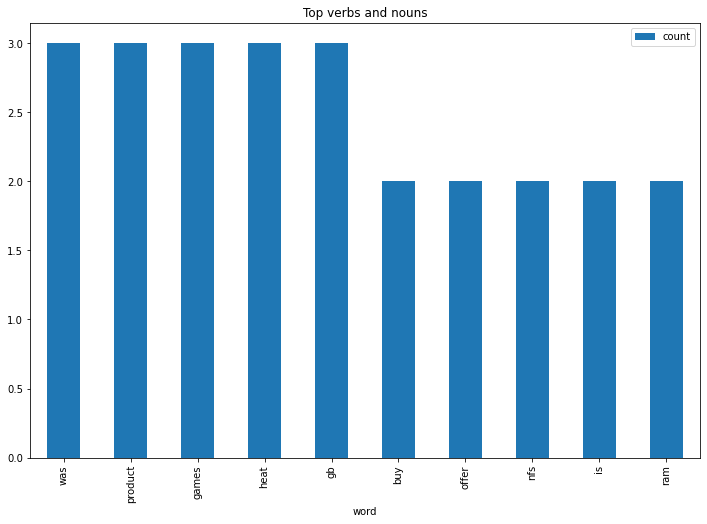

In [22]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')